In [1]:
import mmcv as mmcv
import torch as torch
import torchvision as tv
import mmdet as mmdet
import mmocr as mmocr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Users\Satyam Arora\mmocr')
import glob
import json
import numpy as np
import pandas as pd
import cv2
import math

In [2]:
from mmcv.ops import get_compiler_version, get_compiling_cuda_version

print(f'PyTorch version: {torch.__version__}')
print(f'TorchVision version: {tv.__version__}')
print(f'MMDetection version: {mmdet.__version__}')
print(f'MMOCR version: {mmocr.__version__}')
print(f'Compiler: {get_compiler_version()}')
print(f'CUDA compiler: {get_compiling_cuda_version()}')

PyTorch version: 1.10.2
TorchVision version: 0.11.3
MMDetection version: 3.0.0rc6
MMOCR version: 1.0.0rc6
Compiler: MSVC 192829924
CUDA compiler: 11.3


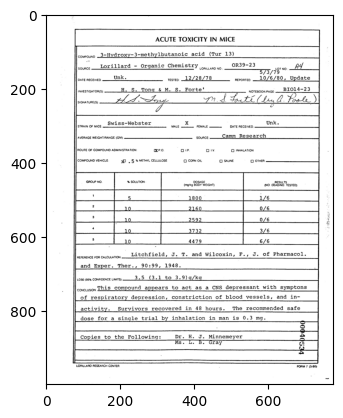

In [7]:
img = mmcv.imread('ip_work/training_data/images/00040534.png')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

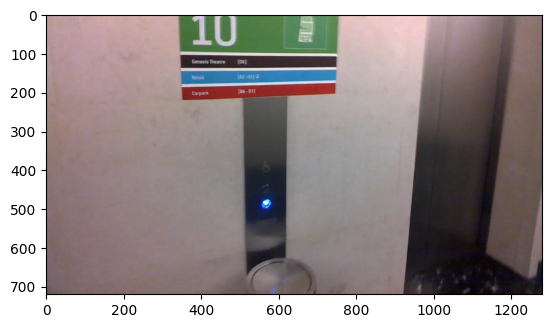

In [8]:
img = mmcv.imread(r'C:\Users\Satyam Arora\mmocr\tests\data\det_toy_dataset\imgs\test\img_1.jpg')
plt.imshow(mmcv.bgr2rgb(img))

In [8]:
from mmocr.apis.inferencers import MMOCRInferencer

images = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_data\images\*.png')

# perform inference on a single image
ocr = MMOCRInferencer(det='DBNet', rec='CRNN')
for img in images:
    ocr(img, out_dir='ip_work/training_res/image_result', save_vis=True)
    ocr(img, out_dir='ip_work/training_res/text_result', save_pred=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet50-oclip_1200e_icdar2015/dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/crnn/crnn_mini-vgg_5e_mj/crnn_mini-vgg_5e_mj_20220826_224120-8afbedbb.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



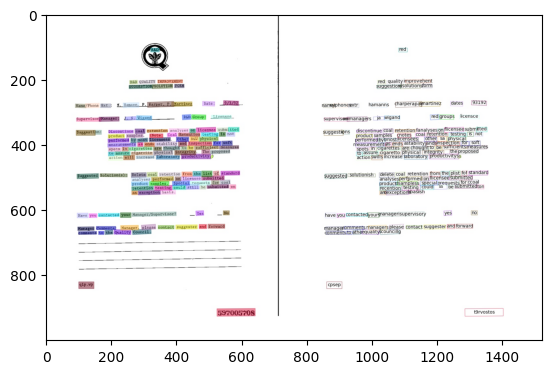

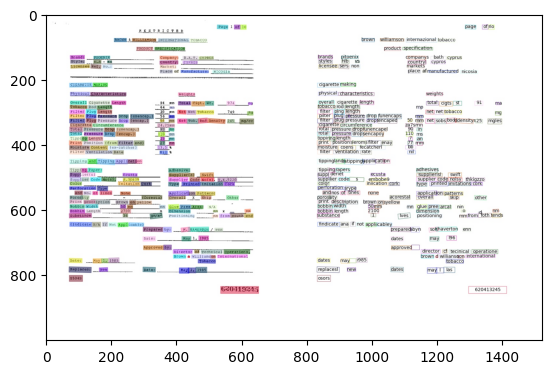

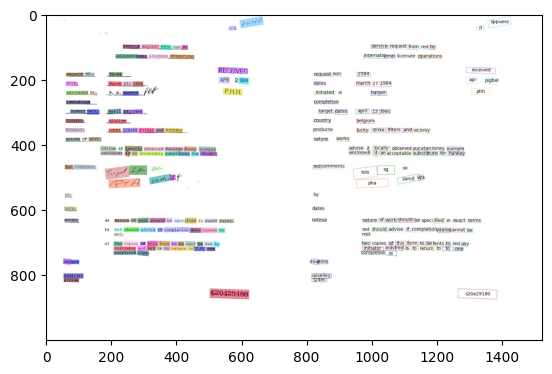

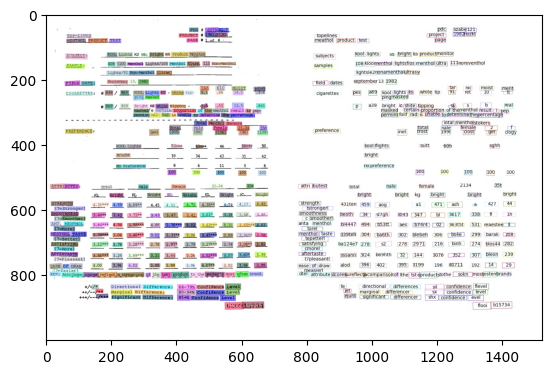

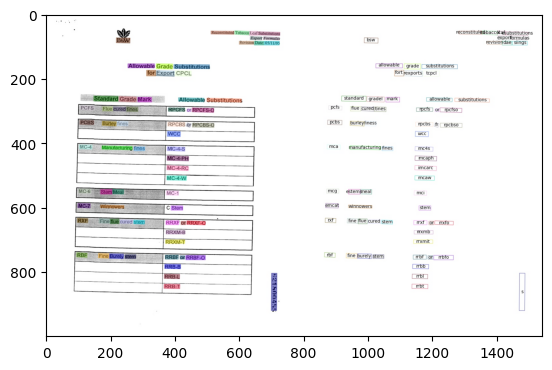

In [12]:
# plot the result
res_images = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_res\image_result\vis\*.jpg')

for i in range(5):
    img = mmcv.imread(res_images[i])
    plt.imshow(mmcv.bgr2rgb(img))
    plt.show()

In [13]:
res_json = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_res\text_result\preds\*.json')

for i in range(5):
    with open(res_json[i]) as f:
        data = json.load(f)
        print(data)

{'rec_texts': ['t9rvostos', 'cpsep', 'conments', 'to', 'equality', 'athe', 'scouncillg', 'manager', 'comments', 'managers', 'contact', 'suggester', 'please', 'and', 'forward', 'you', 'contacted', 'have', 'lyours', 'managerisupervisory', 'no', 'yes', 'an', 'dexceptions', 'hbasish', 'recention', 'testing', 'be', 'could', 'ton', 'submitted', 'ss', 'product', 'dsampless', 'prequests', 'special', 'for', 'ccoal', '1', 'analyses', 'performed', 'on', 'flicensee', 'submitted', 'suggested', 'solutionish', 'delete', 'coal', 'retention', 'from', 'the', 'standard', 'fof', 'plist', 'action', 'increase', 'swills', 'laboratory', 's', 'productivitys', 'to', 'assure', 'cigaretto', 'integrity', 'physical', 'proposed', 'the', 'spots', 'cigarettes', 'in', 'are', 'to', 'chought', 'sufficients', 'be', 'measures', 'measurements', 'ends', 'as', 'astability', 'inspection', 'jands', 'soft', 'for', 'performed', 'tmost', 'by', 'licensees', 'other', 'sa', 'physical', 'product', 'samples', 'cnotes', 'retention', 'co

In [4]:
# function to remove duplicate from a list
def remove(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list

# sort an array in ascending order
def sort(arr):
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if(arr[i] > arr[j]):
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp
    return arr

In [5]:
Acc_Box = []
Acc_cor_Box = []
Acc_ann = []
Acc_pred = []
Acc_dented_ann = []
Acc_dented_pred = []

rec_data = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_res\text_result\preds\*.json')
got_data = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_data\annotations\*.json')

for z in range(len(rec_data)):

    f = open(rec_data[z], 'r')

    data = json.load(f)

    rec_texts = data['rec_texts']

    rec_scores = np.zeros(len(rec_texts))

    for i in range(len(data['rec_scores'])):
        rec_scores[i] = data['rec_scores'][i]

    rec_scores = np.nan_to_num(rec_scores)

    det_boxes = data['det_polygons']

    # print(len(rec_scores), len(rec_texts), len(det_boxes))

    # print(np.mean(rec_scores))

    # print(det_boxes)

    for i in range(len(det_boxes)):
        for j in range(len(det_boxes[i])):
            det_boxes[i][j] = round(det_boxes[i][j])

    # print(det_boxes)

    # print(det_boxes[85], det_boxes[98], det_boxes[106])

    boxes = []
    for i in range(len(det_boxes)):
        boxes.append(remove(det_boxes[i]))

    # print(boxes)

    new_boxes = []
    for i in range(len(boxes)):
        if(len(boxes[i]) == 4):
            new_boxes.append(boxes[i])
        else:
            temp = []
            for j in range(len(boxes[i])):
                t = 0
                for k in range(len(temp)):
                    if(abs(boxes[i][j] - temp[k]) <= 3):
                        t = 1
                        break
                if(t == 0):
                    temp.append(boxes[i][j])
            new_boxes.append(temp)


    # print(rec_texts)    
    # print(new_boxes)

    err_boxes = []

    for i in range(len(new_boxes)):
        if(len(new_boxes[i]) != 4):
            err_boxes.append(i)

    f.close()

    f = open(got_data[z], 'r')

    data = json.load(f)

    data = data['form']

    # print(data[36]['words'])

    giv_texts = []

    for i in range(len(data)):
        for j in range(len(data[i]['words'])):
            giv_texts.append(data[i]['words'][j]['text'].lower())

    giv_boxes = []

    for i in range(len(data)):
        for j in range(len(data[i]['words'])):
            giv_boxes.append(data[i]['words'][j]['box'])

    f.close()

    # print(giv_texts)
    # print(giv_boxes)
    # print(err_boxes)
    # print(len(giv_texts), len(giv_boxes), len(err_boxes))

    rec_boxes = []
    for i in range(len(new_boxes)):
        rec_boxes.append(sort(new_boxes[i]))

    got_boxes = []
    for i in range(len(giv_boxes)):
        got_boxes.append(sort(giv_boxes[i]))

    acc_actual = 0
    acc_dented = 0

    for i in range(len(rec_boxes)):
        if(i not in err_boxes):
            for j in range(len(got_boxes)):
                f1 = 0 
                f2 = 0
                f3 = 0
                f4 = 0
                if(abs(rec_boxes[i][0] - got_boxes[j][0]) <= 3):
                    f1 = 1
                if(abs(rec_boxes[i][1] - got_boxes[j][1]) <= 3):
                    f2 = 1
                if(abs(rec_boxes[i][2] - got_boxes[j][2]) <= 3):
                    f3 = 1
                if(abs(rec_boxes[i][3] - got_boxes[j][3]) <= 3):
                    f4 = 1
                if(f1 == 1 and f2 == 1 and f3 == 1 and f4 == 1):
                    if(giv_texts[j] == rec_texts[i]):
                        acc_actual += 1
                        acc_dented += 1
                    elif(abs(len(giv_texts[j]) - len(rec_texts[i])) <= 2):
                        acc_dented += 1
                    break

    # print(acc_actual, acc_dented)

    Acc_Box.append(len(rec_boxes) / len(got_boxes))
    Acc_cor_Box.append((len(rec_boxes) - len(err_boxes)) / len(got_boxes))
    Acc_ann.append(acc_actual / len(giv_texts))
    Acc_pred.append(acc_actual / len(rec_texts))
    Acc_dented_ann.append(acc_dented / len(giv_texts))
    Acc_dented_pred.append(acc_dented / len(rec_texts))

    print("File Name:", got_data[z])

    print("\nAccuracy of Boxes:", len(rec_boxes) / len(got_boxes))
    print("Accuracy of Correct Boxes:", (len(rec_boxes) - len(err_boxes)) / len(got_boxes))
    print("On Point Accuracy according to Annotations:", acc_actual / len(giv_texts))
    print("On Point Accuracy according to Predictions:", acc_actual / len(rec_texts))
    print("Accuracy of Dented Boxes according to Annotations:", acc_dented / len(giv_texts))
    print("Accuracy of Dented Boxes according to Predictions:", acc_dented / len(rec_texts))
    print("\n----------------------------------------------------------------------------------------------------------------\n")

File Name: C:\Users\Satyam Arora\mmocr\ip_work\training_data\annotations\0000971160.json

Accuracy of Boxes: 0.8851351351351351
Accuracy of Correct Boxes: 0.8513513513513513
On Point Accuracy according to Annotations: 0.4391891891891892
On Point Accuracy according to Predictions: 0.4961832061068702
Accuracy of Dented Boxes according to Annotations: 0.6554054054054054
Accuracy of Dented Boxes according to Predictions: 0.7404580152671756

----------------------------------------------------------------------------------------------------------------

File Name: C:\Users\Satyam Arora\mmocr\ip_work\training_data\annotations\0000989556.json

Accuracy of Boxes: 0.9525862068965517
Accuracy of Correct Boxes: 0.9353448275862069
On Point Accuracy according to Annotations: 0.3793103448275862
On Point Accuracy according to Predictions: 0.39819004524886875
Accuracy of Dented Boxes according to Annotations: 0.6551724137931034
Accuracy of Dented Boxes according to Predictions: 0.6877828054298643

---

In [6]:
# plotting funciton
def plot_graph(x, y, x_label, y_label, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
            marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

Average Accuracy of Boxes: 0.8771324136439991
Average Accuracy of Correct Boxes: 0.8430952725819222
Average On Point Accuracy according to Annotations: 0.284189804683431
Average On Point Accuracy according to Predictions: 0.3221211833973321
Average Accuracy of Dented Boxes according to Annotations: 0.5086787947460908
Average Accuracy of Dented Boxes according to Predictions: 0.5784254391575792

----------------------------------------------------------------------------------------------------------------



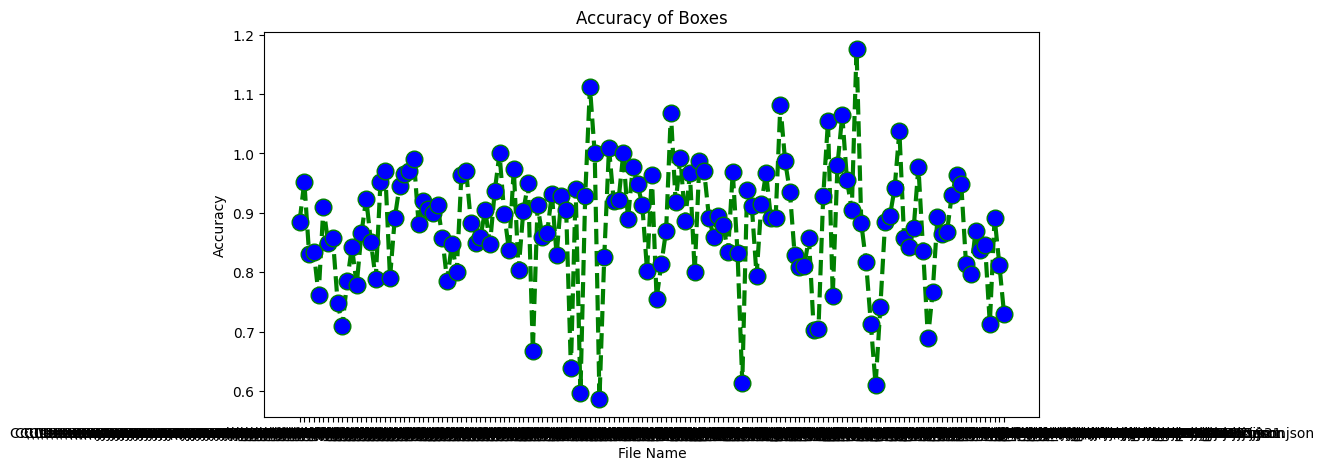

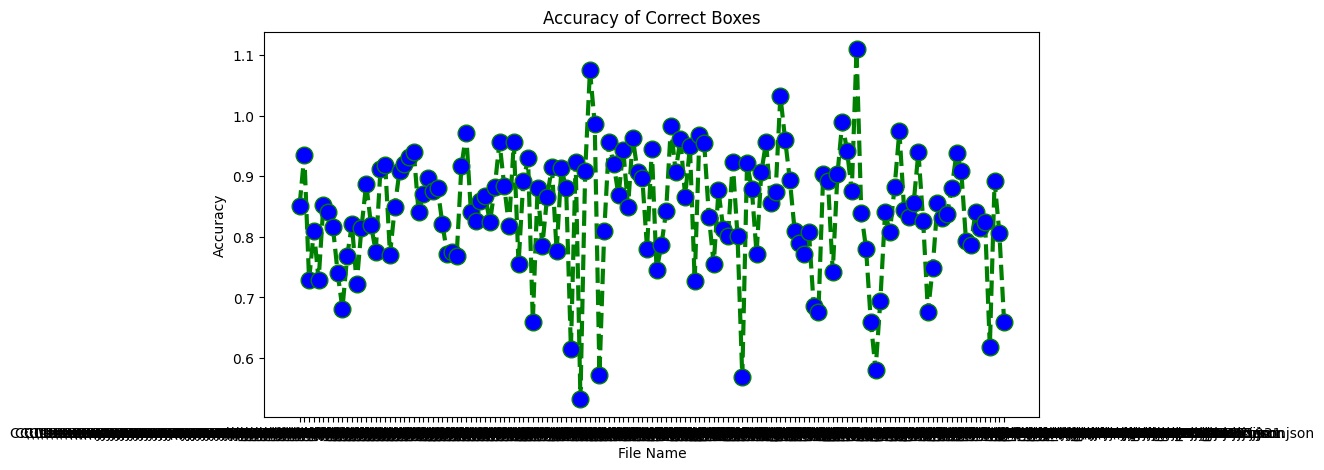

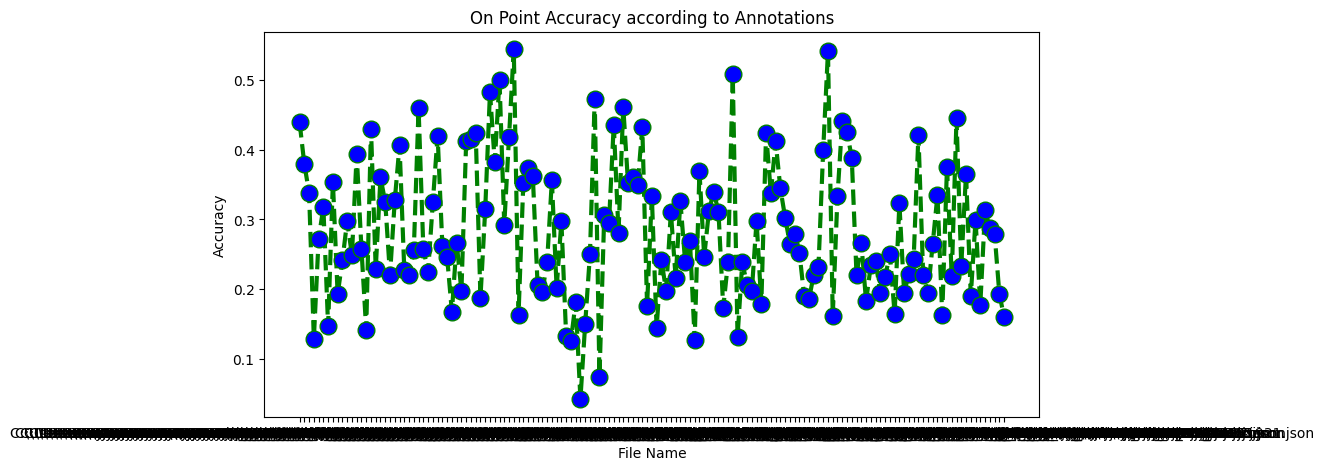

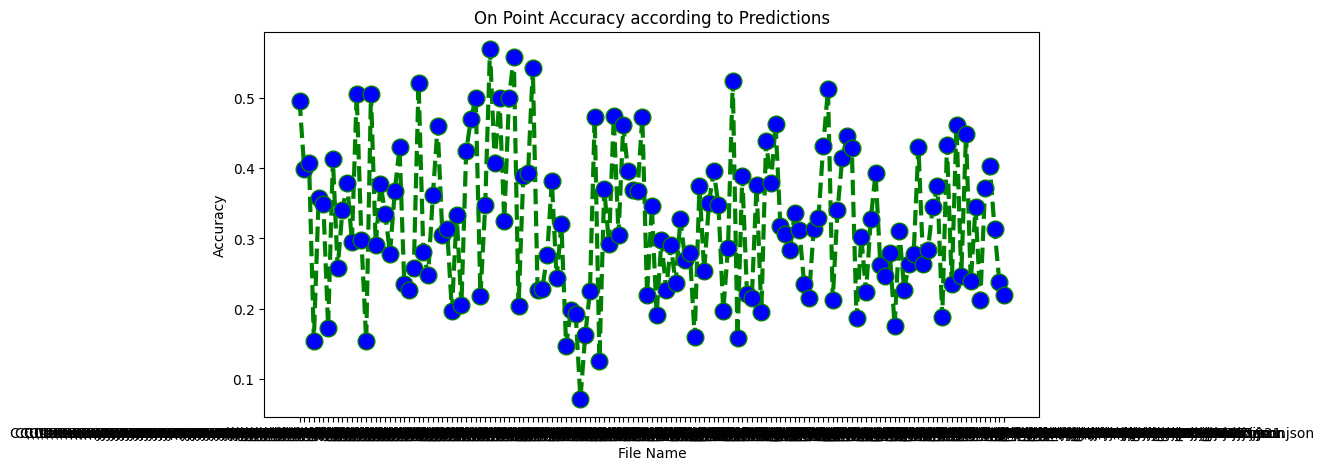

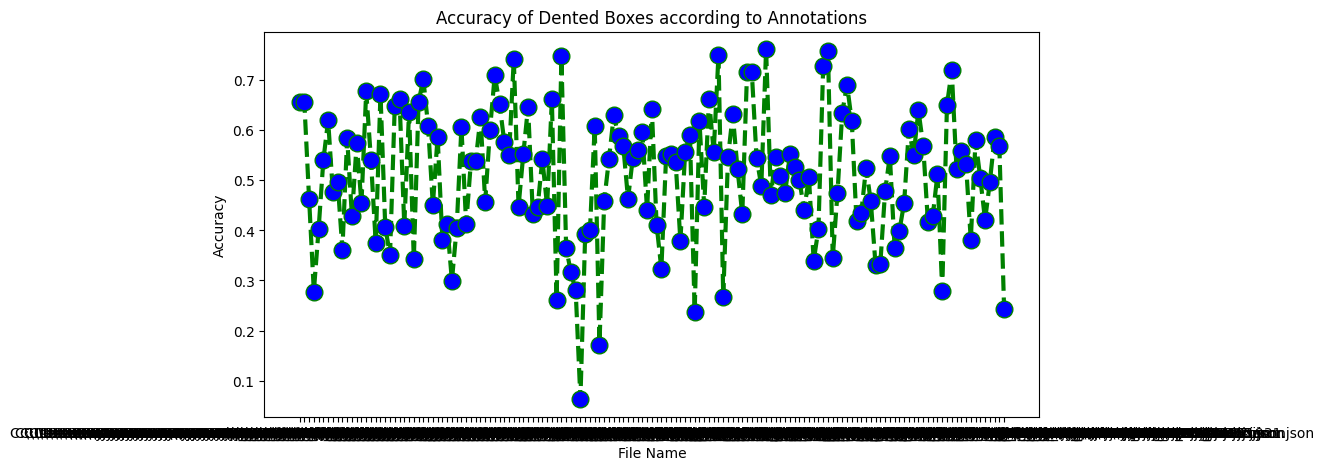

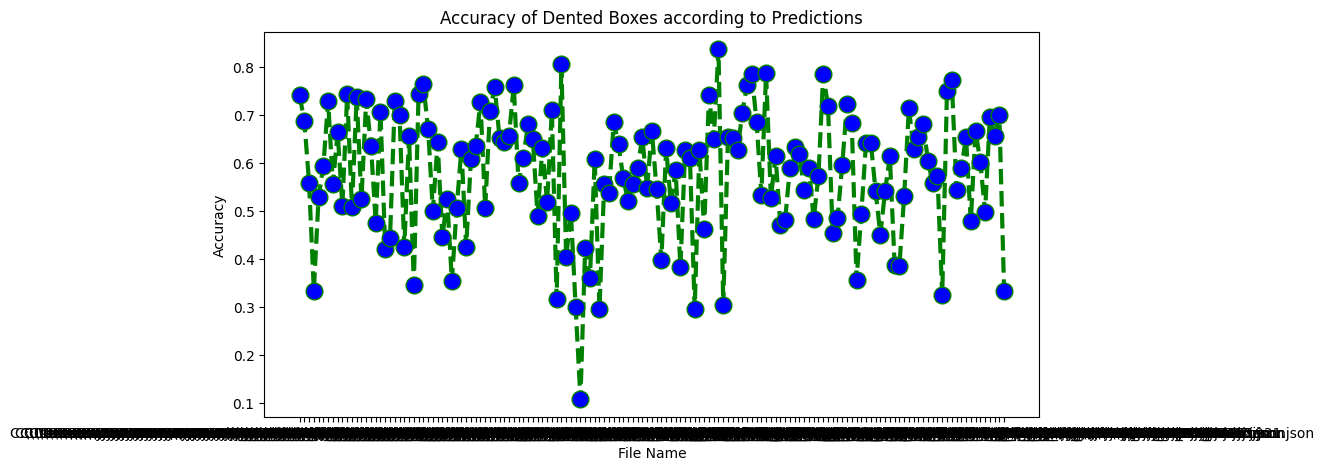

In [7]:
print("Average Accuracy of Boxes:", np.mean(Acc_Box))
print("Average Accuracy of Correct Boxes:", np.mean(Acc_cor_Box))
print("Average On Point Accuracy according to Annotations:", np.mean(Acc_ann))
print("Average On Point Accuracy according to Predictions:", np.mean(Acc_pred))
print("Average Accuracy of Dented Boxes according to Annotations:", np.mean(Acc_dented_ann))
print("Average Accuracy of Dented Boxes according to Predictions:", np.mean(Acc_dented_pred))

print("\n----------------------------------------------------------------------------------------------------------------\n")

plot_graph(got_data, Acc_Box, "File Name", "Accuracy", "Accuracy of Boxes")

plot_graph(got_data, Acc_cor_Box, "File Name", "Accuracy", "Accuracy of Correct Boxes")

plot_graph(got_data, Acc_ann, "File Name", "Accuracy", "On Point Accuracy according to Annotations")

plot_graph(got_data, Acc_pred, "File Name", "Accuracy", "On Point Accuracy according to Predictions")

plot_graph(got_data, Acc_dented_ann, "File Name", "Accuracy", "Accuracy of Dented Boxes according to Annotations")

plot_graph(got_data, Acc_dented_pred, "File Name", "Accuracy", "Accuracy of Dented Boxes according to Predictions")

In [ ]:
# generate machine learing model for the given data
# train the model
# test the model
# generate the accuracy of the model

In [16]:
# function to sort an array of strings according to alphabetical order
def sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr) - i - 1):
            if(arr[j] > arr[j + 1]):
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp
    return arr

In [21]:
# word wise accuracy:

rec_data = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_res\text_result\preds\*.json')
got_data = glob.glob(r'C:\Users\Satyam Arora\mmocr\ip_work\training_data\annotations\*.json')

for z in range(len(rec_data)):
    word_dict = {} 

    f = open(got_data[z], 'r')

    data = json.load(f)

    data = data['form']

    giv_texts = []

    for i in range(len(data)):
        for j in range(len(data[i]['words'])):
            if(data[i]['words'][j]['text'] == ""):
                continue
            giv_texts.append(data[i]['words'][j]['text'].lower())

    f.close()

    giv_texts = sort(giv_texts)

    for i in range(len(giv_texts)):
        if(giv_texts[i] in word_dict.keys()):
            word_dict[giv_texts[i]] += 1
        else:
            word_dict[giv_texts[i]] = 1

    f = open(rec_data[z], 'r')

    data = json.load(f)

    rec_text = data['rec_texts']

    rec_texts = []
    for i in range(len(rec_text)):
        if(rec_text[i] == ""):
            continue
        rec_texts.append(rec_text[i].lower())

    rec_texts = sort(rec_texts)

    f.close()

    acc_actual = 0
    acc_dented = 0

    print(giv_texts)
    print("--------------------")
    print(rec_texts)
    print("--------------------\n")





['(note', '(s)', ')', '.', '.', '/', '/', '3/', '597005708', '9/', '92', ':', ':', ':', ':', 'action', 'an', 'analyses', 'analyses', 'and', 'and', 'are', 'as', 'assure', 'b&w', 'basis.', 'be', 'be', 'by', 'cigarette', 'ciparettes', 'coal', 'coal', 'coal', 'coal', 'comments', 'comments:', 'contact', 'contacted', 'could', 'council.', 'date:', 'delete', 'discontinue', 'ends', 'exception', 'ext.', 'for', 'for', 'form', 'forward', 'from', 'group:', 'hamann', 'harper,', 'have', 'improvement', 'in', 'increase', 'inspection', 'integrity.', 'is', 'j.', 'laboratory', 'licensee', 'licensee', 'licensee', 'licensees.', 'list', 'm.', 'manager', 'manager', 'manager,', 'manager/', 'martinez', 'measurements', 'measures', 'most', 'name', 'no', 'not', 'of', 'on', 'on', 'on', 'other', 'p.', 'p.', 'performed', 'performed', 'phone', 'physical', 'physical', 'please', 'product', 'product', 'productivity', 'proposed', 'qip', 'quality', 'quality', 'r&d', 'r&d', 'r&d', 'requests', 'retention', 'retention', 'rete